In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import os
import librosa
import librosa.display as lib_display
import numpy as np

In [2]:
emotion_path_csv = os.path.abspath("Emotion_path_mapped.csv")
df = pd.read_csv(emotion_path_csv,index_col=False).drop(["Unnamed: 0"],axis=1)
df.head(10)

,Emotion,Path
0,neutral,p:\TMSL\SEM3_Minor_Projet\Notebooks\Datasets\R...
1,neutral,p:\TMSL\SEM3_Minor_Projet\Notebooks\Datasets\R...
2,neutral,p:\TMSL\SEM3_Minor_Projet\Notebooks\Datasets\R...
3,neutral,p:\TMSL\SEM3_Minor_Projet\Notebooks\Datasets\R...
4,calm,p:\TMSL\SEM3_Minor_Projet\Notebooks\Datasets\R...
5,calm,p:\TMSL\SEM3_Minor_Projet\Notebooks\Datasets\R...
6,calm,p:\TMSL\SEM3_Minor_Projet\Notebooks\Datasets\R...
7,calm,p:\TMSL\SEM3_Minor_Projet\Notebooks\Datasets\R...
8,calm,p:\TMSL\SEM3_Minor_Projet\Notebooks\Datasets\R...
9,calm,p:\TMSL\SEM3_Minor_Projet\Notebooks\Datasets\R...


C:\Users\PRITAM\miniconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


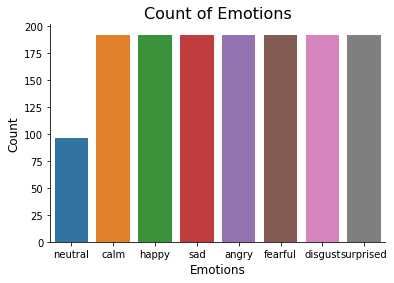

In [6]:
plt.title('Count of Emotions', size=16)
sns.countplot(df.Emotion)
plt.ylabel('Count', size=12)
plt.xlabel('Emotions', size=12)
sns.despine(top=True, right=True, left=False, bottom=False)
plt.show()

## Waveplot & Spectogram Function

---

In [7]:
def create_waveplot(data, samp_rate, emotion):
    plt.figure(figsize=(10, 3))
    plt.title(f'Waveplot for audio with {emotion} emotion', size=15)
    lib_display.waveshow(data, sr=samp_rate)
    plt.show()

def create_spectrogram(data, samp_rate, emotion):
    # stft function converts the data into short term fourier transform
    X = librosa.stft(data)
    # print(f"X : {X}")
    Xdb = librosa.amplitude_to_db(np.abs(X))
    plt.figure(figsize=(12, 3)) #12 inchs X 3 inchs 
    plt.title(f'Spectrogram for audio with {emotion} emotion', size=15)
    lib_display.specshow(Xdb, sr=samp_rate, x_axis='time', y_axis='hz')   
    #librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='log')
    plt.colorbar()
    return Xdb

## Data Augmentation Function

---
> Adding

> - Noise

> - Stretch

> - Shift

> - Pitch

In [13]:

def noise(data):
    noise_amp = 0.025*np.random.uniform()*np.amax(data)
    data = data + noise_amp*np.random.normal(size=data.shape[0])
    return data

def stretch(data, rate=0.8):
    """
        data: Main Audio
        Rate: The rate in which the audio is being slowed or fast
        FROMULA/ Function  : librosa.effects.time_stretch(data, rate)
    """
    return librosa.effects.time_stretch(data, rate)

def shift(data):
    """
        data: it takes only audio data as parameter
        returns np array of new audio
    """
    shift_range = int(np.random.uniform(low=-5, high = 5)*1000)
    return np.roll(data, shift_range)

def pitch(data, sampling_rate, pitch_factor=0.7):
    return librosa.effects.pitch_shift(data, sampling_rate, pitch_factor)


# Example of Waveplot, Spectogram & Data Augmentation

---

In [14]:
import ipywidgets.widgets as wdg 
emos = df.Emotion.unique()
# print(emos)
emo_wdg = wdg.Dropdown(
    options=emos,
    value=emos[0],
    description='Emotion',
    disabled=False,
)

emo_wdg

Dropdown(description='Emotion', options=('neutral', 'calm', 'happy', 'sad', 'angry', 'fearful', 'disgust', 'su…

03-01-01-01-02-02-08.wav


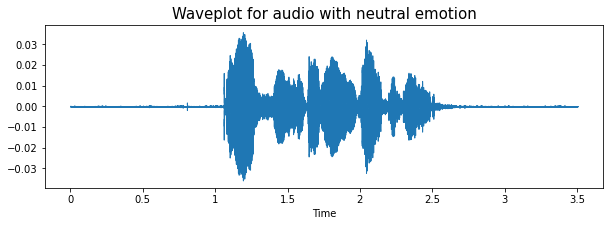

array([[-24.24135 , -24.673843, -26.680582, ..., -24.51745 , -33.099186,
        -51.376984],
       [-32.15146 , -29.012272, -33.490562, ..., -29.440002, -34.95524 ,
        -41.789635],
       [-62.022167, -35.20818 , -37.279892, ..., -35.378796, -33.21589 ,
        -36.9661  ],
       ...,
       [-62.022167, -62.022167, -62.022167, ..., -62.022167, -62.022167,
        -62.022167],
       [-62.022167, -62.022167, -62.022167, ..., -62.022167, -62.022167,
        -62.022167],
       [-62.022167, -62.022167, -62.022167, ..., -62.022167, -62.022167,
        -62.022167]], dtype=float32)

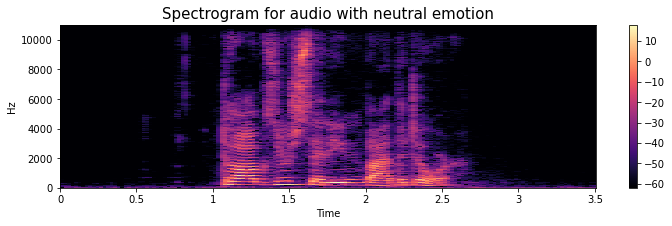

In [15]:
import numpy as np
import random as rnd

emotion=emo_wdg.value
path = rnd.choice(np.array(df.Path[df.Emotion==emotion]))
print(path.split("\\")[-1])
data, sampling_rate = librosa.load(path)
create_waveplot(data, sampling_rate, emotion)
create_spectrogram(data, sampling_rate, emotion)
# ipd.Audio(path)


03-01-01-01-02-02-08.wav


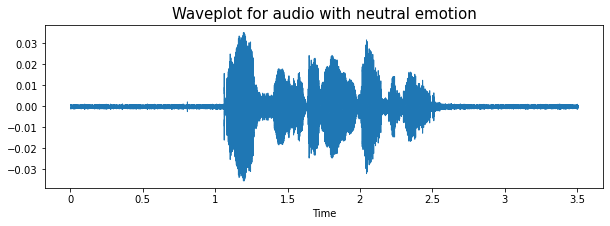

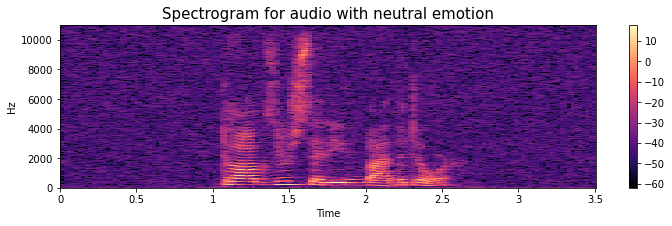

In [16]:
# taking any example and checking for techniques.
# path = np.array(df.Path)[1]
print(path.split("\\")[-1])

data, sample_rate = librosa.load(path)

noise_added_data = noise(data)
create_waveplot(noise_added_data, sampling_rate, emotion)
noise_image = create_spectrogram(noise_added_data, sampling_rate, emotion)

03-01-01-01-02-02-08.wav


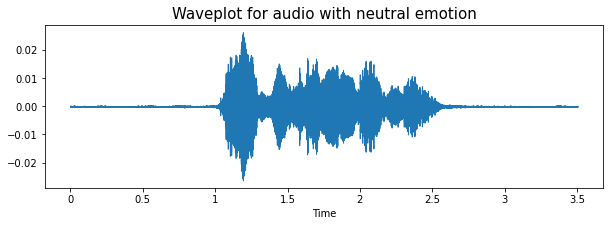

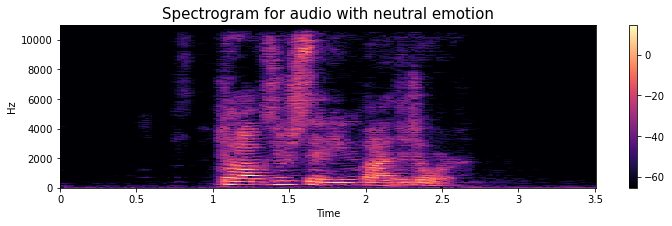

In [17]:
print(path.split("\\")[-1])

data, sample_rate = librosa.load(path)

pitch_added_data = pitch(data,sample_rate,0.4)
create_waveplot(pitch_added_data, sampling_rate, emotion)
pitch_changed_audio = create_spectrogram(pitch_added_data, sampling_rate, emotion)

03-01-01-01-02-02-08.wav


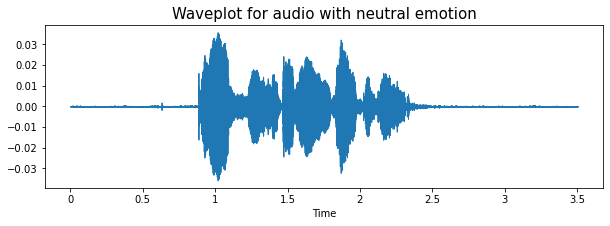

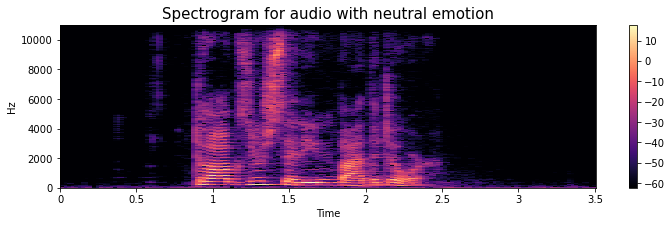

In [18]:
print(path.split("\\")[-1])

data, sample_rate = librosa.load(path)

shift_added_data = shift(data)
create_waveplot(shift_added_data, sampling_rate, emotion)
shift_changed_audio = create_spectrogram(shift_added_data, sampling_rate, emotion)

03-01-01-01-02-02-08.wav


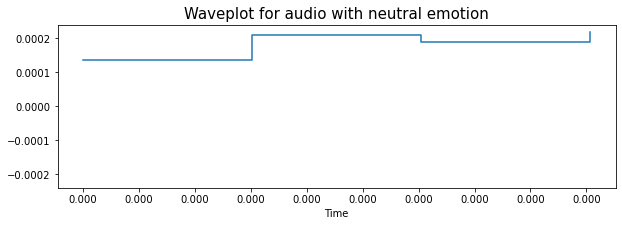

C:\Users\PRITAM\AppData\Roaming\Python\Python39\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=2048 is too small for input signal of length=4
  warnings.warn(


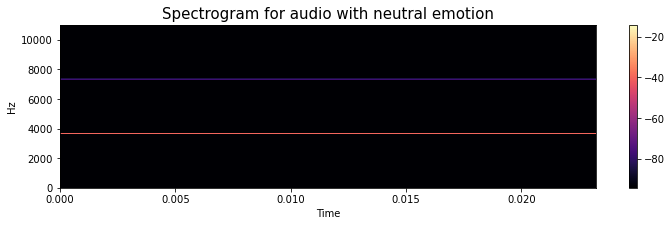

In [19]:
print(path.split("\\")[-1])

data, sample_rate = librosa.load(path)

Stretched_data = stretch(data,sample_rate)
create_waveplot(Stretched_data, sampling_rate, emotion)
Stretched_audio = create_spectrogram(Stretched_data, sampling_rate, emotion)

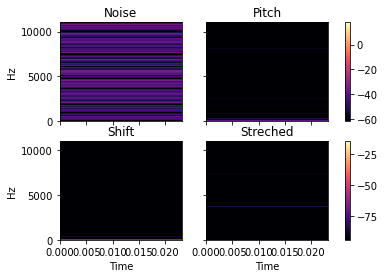

In [20]:
# Construct a subplot grid with 3 rows and 1 column, sharing the x-axis)
fig, ax = plt.subplots(nrows=1 , ncols=2, sharex=True,sharey=True)

# On the first subplot, show the original spectrogram
audio_file_selected = path.split("\\")[-1]
plt.title(f"File - {audio_file_selected}  || Emotion - {emotion}")

img1 = lib_display.specshow(noise_image, sr=sample_rate, x_axis='time', y_axis='hz',ax=ax[0][0])
ax[0][0].set(title='Noise')

# On the second subplot, show the mel spectrogram
img2 = lib_display.specshow(pitch_changed_audio, sr=sample_rate, x_axis='time', y_axis='hz',ax=ax[0][1])
ax[0][1].set(title='Pitch')

# On the third subplot, show the chroma features
img3 = lib_display.specshow(shift_changed_audio, sr=sample_rate, x_axis='time', y_axis='hz',ax=ax[1][0])
ax[1][0].set(title='Shift')

img4 =  lib_display.specshow(Stretched_audio, sr=sample_rate, x_axis='time', y_axis='hz',ax=ax[1][1])
ax[1][1].set(title='Streched')

# To eliminate redundant axis labels, we'll use "label_outer" on all subplots:
for ax_i in ax:
    for ax_j in ax_i:
        ax_j.label_outer()

# And we can share colorbars:
fig.colorbar(img1,ax=[ax[0][0],ax[0][1]])
fig.colorbar(img4,ax=[ax[1][0],ax[1][1]])



# We can then even do fancy things like zoom into a particular time and frequency
# region.  Since the axes are shared, this will apply to all three subplots at once.
# ax[0].set(xlim=[1, 3])  # Zoom to seconds 1-3

# [Link](https://librosa.org/doc/main/auto_examples/plot_display.html)